In [1]:
import model
import analyse
import mcmc
import numpy as np
import time
import noise
import matplotlib.pyplot as plt

# Simulation parametrization 

In [2]:
t = np.arange(0, 365.25*24*60*60, 15.) # 1 year with 1 point per 15 seconds (or 15O seconds)
omega = 2*np.pi*1.000e-3
omega_dot= 0
beta = 0.474
lamb = 5.199
h0 = 1.75*1.0e-22 * 2 * 2 # multiply by 4 for scale... why ? (issue opened) e-22 enlevé
phi0 = 0
i = 0
psi = 0

In [3]:
n = 4000

start = [omega, omega_dot, beta, 5.1, h0, phi0, i, psi]

fixed = [1, 1, 1, 0, 1, 1, 1, 1]
jump_size = [1, 1, 1, 0.05, 0, 1, 1, 1] 

# Import traces from .npy binaries

In [4]:
parameters_trace = np.load('tr_par.npy')
likelihood_trace = np.load('tr_lik.npy')

# Analysis and interpretation

In [5]:
def fetch_parameter_trace(i, parameters_trace):
    ar = []
    for p in parameters_trace:
        ar.append(p[i])
    return ar

likelihoods = likelihood_trace

### Likelihood through iterations

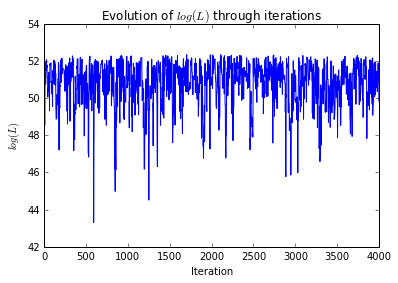

In [6]:
plt.plot(likelihoods[1:])
plt.xlabel('Iteration')
plt.ylabel('$log(L)$')
plt.title('Evolution of $log(L)$ through iterations')

## For $\lambda$ : ecliptical longitude

In [7]:
lambdas = fetch_parameter_trace(3, parameters_trace)

### Scatter plot : likelihood -vs- lambdas

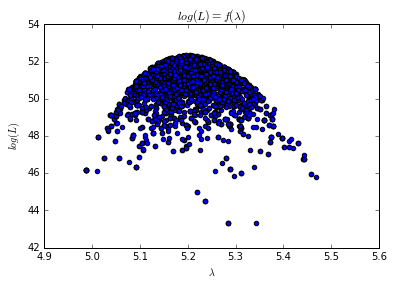

In [8]:
plt.scatter(lambdas[1:], likelihoods[1:])
plt.title('$log(L)=f(\lambda)$')
plt.xlabel('$\lambda$')
plt.ylabel('$log(L)$')

### $\lambda$ as a function of time

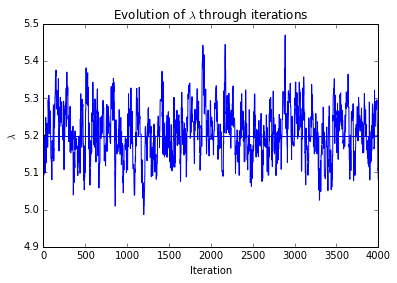

In [9]:
plt.plot(lambdas) 
plt.axhline(y=lamb) # plots horizontal key line
plt.xlabel('Iteration')
plt.ylabel('$\lambda$')
plt.title('Evolution of $\lambda$ through iterations')

### Histogram of $\lambda$ : with automatic box binning

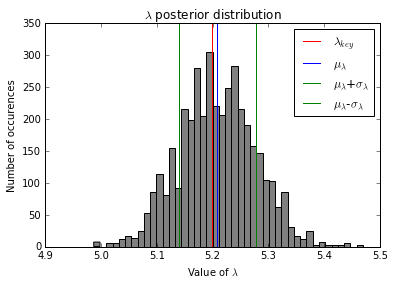

In [11]:
def stat_analysis(par_trace):
    mean = np.mean(par_trace)
    sigma = np.sqrt(np.var(par_trace))
    hist, bin_edges = np.histogram(par_trace)
    mode = (bin_edges[np.argmax(hist)] + bin_edges[np.argmax(hist)])/2  # middle of bin
    return mean, sigma, mode

plt.hist(lambdas, bins='auto', color='grey')
plt.xlabel(r'Value of $\lambda$')
plt.ylabel(r'Number of occurences')
plt.title(r'$\lambda$ posterior distribution')

# Add vertical line at $\lambda_{key}$
plt.axvline(x=lamb, color='r', label='$\lambda_{key}$')

lambda_mean, lambda_sigma, lambda_mode_edges = stat_analysis(lambdas)


# Add vertical line at $E(\lambda)$
plt.axvline(x=lambda_mean, label='$\mu_{\lambda}$')
plt.axvline(x=lambda_mean+lambda_sigma, color='g', label='$\mu_{\lambda}$+$\sigma_{\lambda}$' )
plt.axvline(x=lambda_mean-lambda_sigma, color='g', label='$\mu_{\lambda}$-$\sigma_{\lambda}$' )
plt.legend()

## For $\beta$ : ecliptical latitude

In [12]:
betas = fetch_parameter_trace(2, parameters_trace)

### Scatter plot : log-likelihood -vs- beta

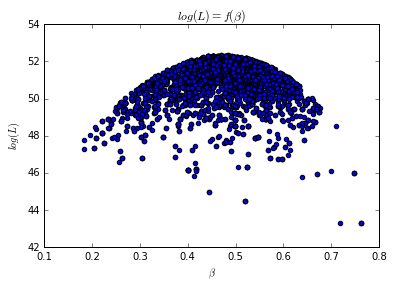

In [13]:
plt.scatter(betas[1:], likelihoods[1:])
plt.title(r'$log(L)=f(\beta)$')
plt.xlabel(r'$\beta$')
plt.ylabel('$log(L)$')

### $\beta$ as a function of time

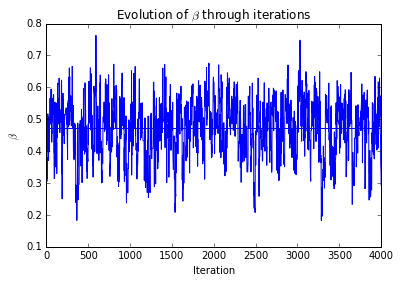

In [14]:
plt.plot(betas)
plt.axhline(y=beta) # plots horizontal key line
plt.xlabel('Iteration')
plt.ylabel(r'$\beta$')
plt.title(r'Evolution of $\beta$ through iterations')

### Histogram of $\beta$ : automatic box binning

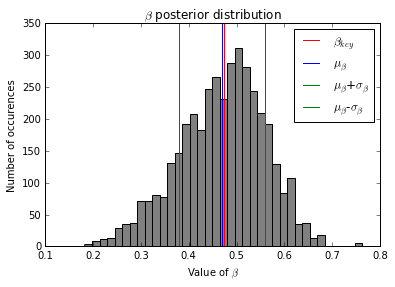

In [15]:
plt.hist(betas, bins='auto', color='grey')
plt.xlabel(r'Value of $\beta$')
plt.ylabel('Number of occurences')
plt.title(r'$\beta$ posterior distribution')

# Add vertical line at $\beta_{key}$
plt.axvline(x=beta, color='r', label=r'$\beta_{key}$')

beta_mean, beta_sigma, beta_mode_edges = stat_analysis(betas)


# Add vertical line at $E(\beta)$
plt.axvline(x=beta_mean, label=r'$\mu_{\beta}$')
plt.axvline(x=beta_mean+beta_sigma, color='g', label=r'$\mu_{\beta}$+$\sigma_{\beta}$' )
plt.axvline(x=beta_mean-beta_sigma, color='g', label=r'$\mu_{\beta}$-$\sigma_{\beta}$' )
plt.legend()


## For $\omega$ : ecliptical latitude

In [16]:
omegas = fetch_parameter_trace(0, parameters_trace)

### Scatter plot : log-likelihood -vs- $\omega$

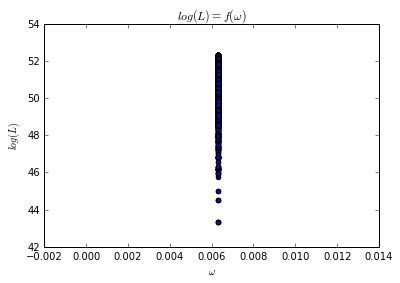

In [17]:
plt.scatter(omegas[1:], likelihoods[1:])
plt.title('$log(L)=f(\omega)$')
plt.xlabel('$\omega$')
plt.ylabel('$log(L)$')

### $\omega$ as a function of time

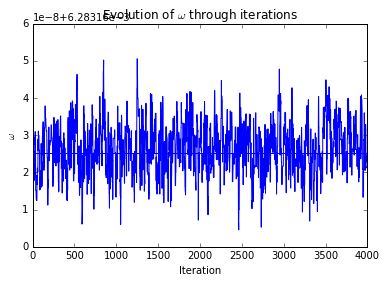

In [18]:
plt.plot(omegas)
plt.axhline(y=omega) # plots horizontal key line
plt.xlabel('Iteration')
plt.ylabel('$\omega$')
plt.title('Evolution of $\omega$ through iterations')

### Histogram of $\omega$ : automatic box binning

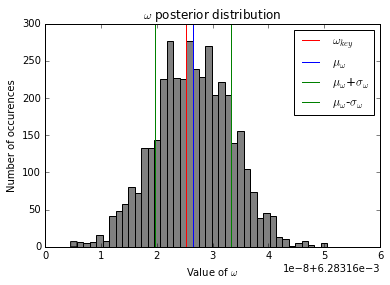

In [19]:
plt.hist(omegas, bins='auto', color='grey')
plt.xlabel('Value of $\omega$')
plt.ylabel('Number of occurences')
plt.title('$\omega$ posterior distribution')

# Add vertical line at $\omega_{key}$
plt.axvline(x=omega, color='r', label='$\omega_{key}$')

omega_mean, omega_sigma, omega_mode_edges = stat_analysis(omegas)


# Add vertical line at $E(\omega)$
plt.axvline(x=omega_mean, label='$\mu_{\omega}$')
plt.axvline(x=omega_mean+omega_sigma, color='g', label='$\mu_{\omega}$+$\sigma_{\omega}$' )
plt.axvline(x=omega_mean-omega_sigma, color='g', label='$\mu_{\omega}$-$\sigma_{\omega}$' )
plt.legend()


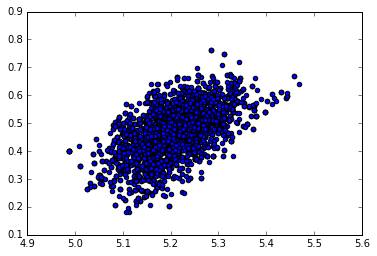

In [21]:
plt.scatter(lambdas[1:], betas[1:])